In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

   Month Month-Year  Total Construction  Private Construction  \
0      1     Jan-02               59516                 45273   
1      2     Feb-02               58588                 44475   
2      3     Mar-02               63782                 49396   
3      4     Apr-02               69504                 53283   
4      5     May-02               73384                 55009   

   Public Construction  
0                14243  
1                14113  
2                14386  
3                16221  
4                18375  


Text(148, 15000, 'Public')

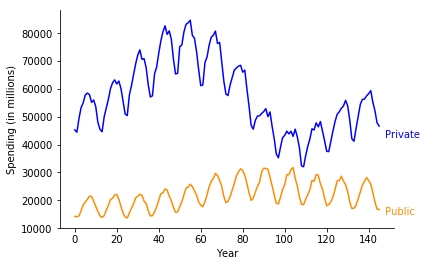

In [170]:
dfConst = pd.read_csv('ConstructionTimeSeriesDatav2.csv')
print(dfConst.head())

fig,ax = plt.subplots()
ax.plot(dfConst['Private Construction'],label='Private Construction Spending', color = 'blue')
ax.plot(dfConst['Public Construction'],label='Public Construction Spending', color = 'darkorange')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.text(148, 42500, 'Private', color = 'b')
ax.axes.text(148, 15000, 'Public', color = 'darkorange')

Average Squared Error per Month - Private Spending:  37395667.05489795
Total squared error - Private Spending =  4113523376.0387745
Average Squared Error per Month - Public Spending:  13581548.10100133
Total squared error - Public Spending =  1493970291.1101463
            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
2003-12-31     24     Dec-03               71050                 55584   
2004-01-31     25     Jan-04               64934                 50975   
2004-02-29     26     Feb-04               64138                 50449   
2004-03-31     27     Mar-04               73238                 57796  

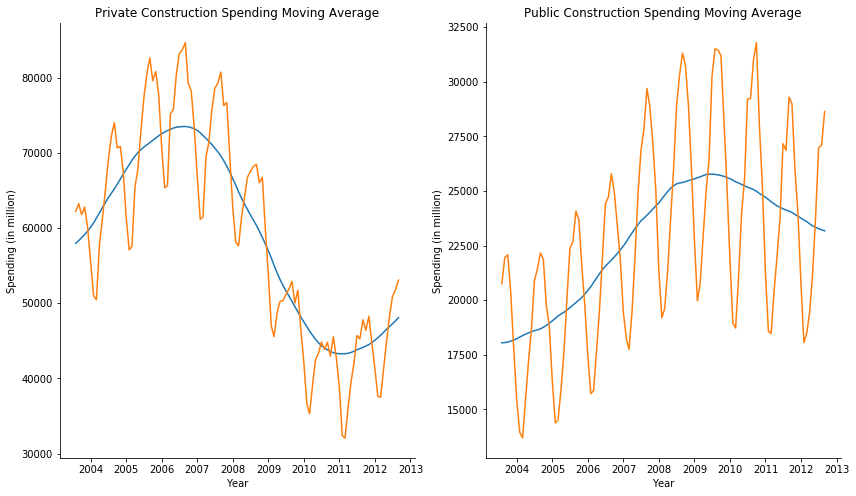

In [171]:
def sqErrPrivate(row):
    return (row['Private Construction'] - row['MovAvgPriv'])**2

def sqErrPublic(row):
    return (row['Public Construction'] - row['MovAvgPub'])**2
    
dfConst['MovAvgPriv'] = np.NaN
dfConst['MovAvgPub'] = np.NaN
dfConst['sqErrPrivate'] = np.NaN
dfConst['sqErrPublic'] = np.NaN

# Changing the DataFrame index to DatetimeIndex data type is required for using one of the functions below
dfConst.index = pd.date_range(freq='m', start='1/31/2002', periods = len(dfConst['Total Construction']))
#print(len(data),'\n',data)

window = 36
window = window - window % 2
# Compute the moving average in the loop below using a window centered on the data point whose average is eing computed
for i in range(int(window/2),dfConst.shape[0]-int(window/2)):
    dfConst.loc[dfConst.index[i],'MovAvgPriv'] = (0.5*dfConst.iloc[i - int(window/2)]['Private Construction'] + dfConst.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*dfConst.iloc[i + int(window/2)]['Private Construction'])/float(window)
    dfConst.loc[dfConst.index[i],'MovAvgPub'] = (0.5*dfConst.iloc[i - int(window/2)]['Public Construction'] + dfConst.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*dfConst.iloc[i + int(window/2)]['Public Construction'])/float(window)

dfConst['sqErrPrivate'] = (dfConst['Private Construction'] - dfConst['MovAvgPriv'])**2
dfConst['sqErrPublic'] = (dfConst['Public Construction'] - dfConst['MovAvgPub'])**2

# The moving average cannot be applied to all rows and we need to delete those rows because we cannot use them in the analysis
dfConst.dropna(how='any',inplace=True)

fig,(ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
ax.plot(dfConst['MovAvgPriv'],label='Moving Avg.')
ax.plot(dfConst['Private Construction'],label='Private Construction Spending')
ax.set_title('Private Construction Spending Moving Average')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in million)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month - Private Spending: ',sum(dfConst['sqErrPrivate'])/len(dfConst))
print('Total squared error - Private Spending = ', sum(dfConst['sqErrPrivate']))

ax1.plot(dfConst['MovAvgPub'],label='Moving Avg.')
ax1.plot(dfConst['Public Construction'],label='Public Construction Spending')
ax1.set_title('Public Construction Spending Moving Average')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (in million)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
print('Average Squared Error per Month - Public Spending: ',sum(dfConst['sqErrPublic'])/len(dfConst))
print('Total squared error - Public Spending = ', sum(dfConst['sqErrPublic']))
print(dfConst)

fig.set_size_inches(14, 8)

In [172]:
dfConst['R1Private'] = dfConst['Private Construction'] - dfConst['MovAvgPriv']
dfConst['R1ErrorPrivate'] = abs((dfConst['Private Construction'] - dfConst['R1Private'])/dfConst['Private Construction'])
dfConst['R1Public'] = dfConst['Public Construction'] - dfConst['MovAvgPub']
dfConst['R1ErrorPublic'] = abs((dfConst['Public Construction'] - dfConst['R1Public'])/dfConst['Public Construction'])
dfConst.style.format({
    'MovAvgPriv': '{:,.1f}'.format,
    'sqErrPrivate': '{:,.1f}'.format,
    'R1Private': '{:,.1f}'.format,
    'R1ErrorPrivate': '{:,.3f}'.format,
    'MovAvgPub': '{:,.1f}'.format,
    'sqErrPublic': '{:,.1f}'.format,
    'R1Public': '{:,.1f}'.format,
    'R1ErrorPublic': '{:,.3f}'.format
})

,Month,Month-Year,Total Construction,Private Construction,Public Construction,MovAvgPriv,MovAvgPub,sqErrPrivate,sqErrPublic,R1Private,R1ErrorPrivate,R1Public,R1ErrorPublic
2003-07-31 00:00:00,19,Jul-03,82971,62216,20755,"57,969.4","18,050.5","18,033,352.0","7,314,395.4","4,246.6",0.932,"2,704.5",0.870
2003-08-31 00:00:00,20,Aug-03,85191,63234,21957,"58,314.9","18,058.0","24,197,107.6","15,202,201.0","4,919.1",0.922,"3,899.0",0.822
2003-09-30 00:00:00,21,Sep-03,83841,61767,22075,"58,718.9","18,084.9","9,290,896.7","15,920,765.0","3,048.1",0.951,"3,990.1",0.819
2003-10-31 00:00:00,22,Oct-03,83133,62813,20321,"59,143.6","18,126.2","13,464,822.5","4,817,354.3","3,669.4",0.942,"2,194.8",0.892
2003-11-30 00:00:00,23,Nov-03,77915,60115,17801,"59,593.5","18,170.0","271,918.8","136,161.0",521.5,0.991,-369.0,1.021
2003-12-31 00:00:00,24,Dec-03,71050,55584,15466,"60,111.7","18,235.5","20,500,394.3","7,670,130.2","-4,527.7",1.081,"-2,769.5",1.179
2004-01-31 00:00:00,25,Jan-04,64934,50975,13959,"60,687.3","18,309.2","94,329,418.8","18,923,950.0","-9,712.3",1.191,"-4,350.2",1.312
2004-02-29 00:00:00,26,Feb-04,64138,50449,13689,"61,335.4","18,377.0","118,514,067.8","21,976,953.3","-10,886.4",1.216,"-4,688.0",1.342
2004-03-31 00:00:00,27,Mar-04,73238,57796,15443,"62,017.4","18,444.6","17,820,241.4","9,009,669.3","-4,221.4",1.073,"-3,001.6",1.194
2004-04-30 00:00:00,28,Apr-04,78354,61177,17177,"62,701.1","18,502.0","2,322,787.7","1,755,625.0","-1,524.1",1.025,"-1,325.0",1.077


Average Residual - Private Spending:  113.25315656565621
Average Residual - Public Spending:  120.58522727272724


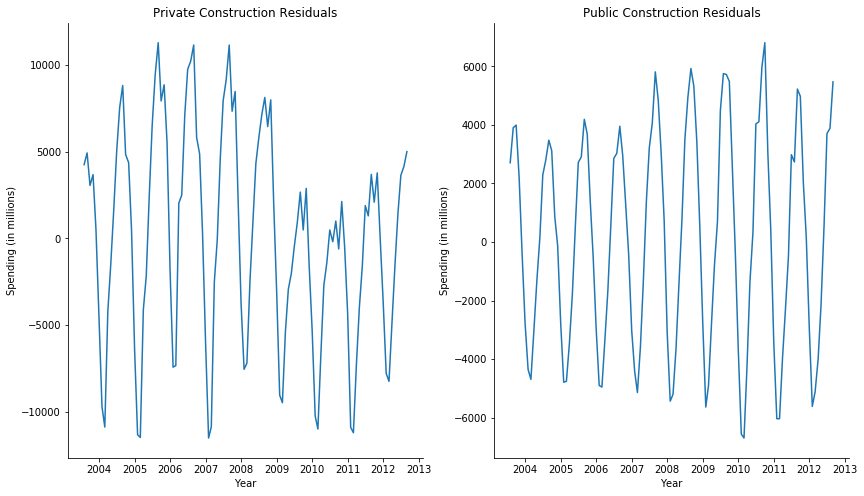

In [173]:
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
ax.plot(dfConst['R1Private'])
ax.set_title('Private Construction Residuals')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual - Private Spending: ', sum(dfConst['R1Private'])/len(dfConst))

ax1.plot(dfConst['R1Public'])
ax1.set_title('Public Construction Residuals')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (in millions)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
print('Average Residual - Public Spending: ', sum(dfConst['R1Public'])/len(dfConst))

fig.set_size_inches(14, 8)




In [174]:
print('Private Spending autocorrelation')

maxCorrPriv = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfConst['R1Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPriv:
        maxCorrPriv = corr
        period = i
print('\n)')
print('period = ',period,'     Maximum Correlation = ',maxCorrPriv)
print('\n')
print('Public Spending autocorrelation')

maxCorrPub = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfConst['R1Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPub:
        maxCorrPub = corr
        period = i
print('\n')
print('period = ',period,'     Maximum Correlation = ',maxCorrPub)

Private Spending autocorrelation
Correlation, lag  1     0.8250475036301713
Correlation, lag  2     0.4820939752221447
Correlation, lag  3     0.0661838628463355
Correlation, lag  4     -0.29310582259154694
Correlation, lag  5     -0.5386625150984725
Correlation, lag  6     -0.6496282831082484
Correlation, lag  7     -0.549838477475518
Correlation, lag  8     -0.3185413831731613
Correlation, lag  9     0.02011606382325631
Correlation, lag  10     0.41176952584284515
Correlation, lag  11     0.7322731003955263
Correlation, lag  12     0.8944851710984221
Correlation, lag  13     0.7299213692607464
Correlation, lag  14     0.4055214152186815
Correlation, lag  15     0.0031237974667481893
Correlation, lag  16     -0.34159925855108353
Correlation, lag  17     -0.5745510163732713
Correlation, lag  18     -0.681216824190257
Correlation, lag  19     -0.5902172854543253
Correlation, lag  20     -0.37531995989940625
Correlation, lag  21     -0.04750388422754723
Correlation, lag  22     0.3369494

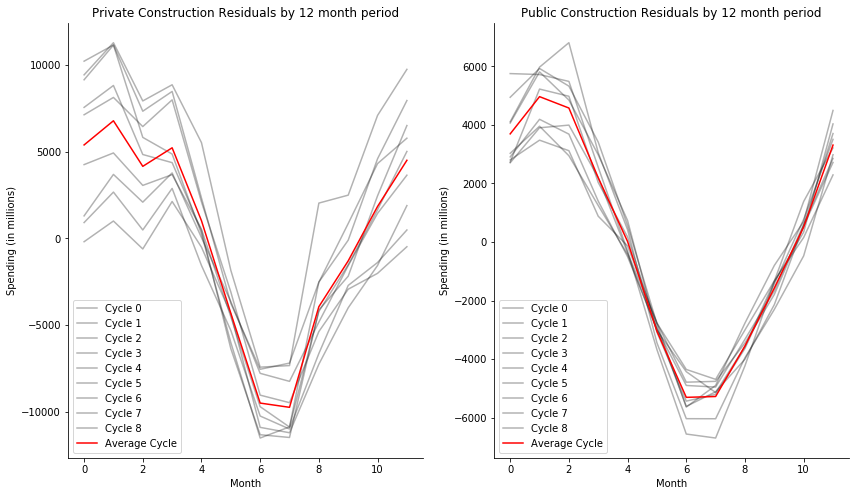

In [175]:
period = 12
cycleLen = period
numCycles = int(len(dfConst)/cycleLen + 0.5)
cyclesPriv = [dfConst.iloc[range(i*period,min((i+1)*period,len(dfConst)))]['R1Private'] for i in range(numCycles)]
ptsInCyclesPriv = [dfConst.iloc[range(i,len(dfConst['R1Private']),period)]['R1Private'].tolist() for i in range(period)]
avgPriv = [sum(pts)/len(pts) for pts in ptsInCyclesPriv]

cyclesPub = [dfConst.iloc[range(i*period,min((i+1)*period,len(dfConst)))]['R1Public'] for i in range(numCycles)]
ptsInCyclesPub = [dfConst.iloc[range(i,len(dfConst['R1Public']),period)]['R1Public'].tolist() for i in range(period)]
avgPub = [sum(pts)/len(pts) for pts in ptsInCyclesPub]


fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2)
for i in range(len(cyclesPriv)):
    ax.plot(cyclesPriv[i].values,label='Cycle '+str(i),c='k', alpha = 0.3)
ax.plot(avgPriv,label='Average Cycle',c='r')
ax.set_title('Private Construction Residuals by 12 month period')
ax.set_xlabel('Month')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()


for i in range(len(cyclesPub)):
    ax1.plot(cyclesPub[i].values,label='Cycle '+str(i),c='k', alpha = 0.3)
ax1.plot(avgPub,label='Average Cycle',c='r')
ax1.set_title('Public Construction Residuals by 12 month period')
ax1.set_xlabel('Month')

ax1.set_ylabel('Spending (in millions)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

fig.set_size_inches(14, 8)

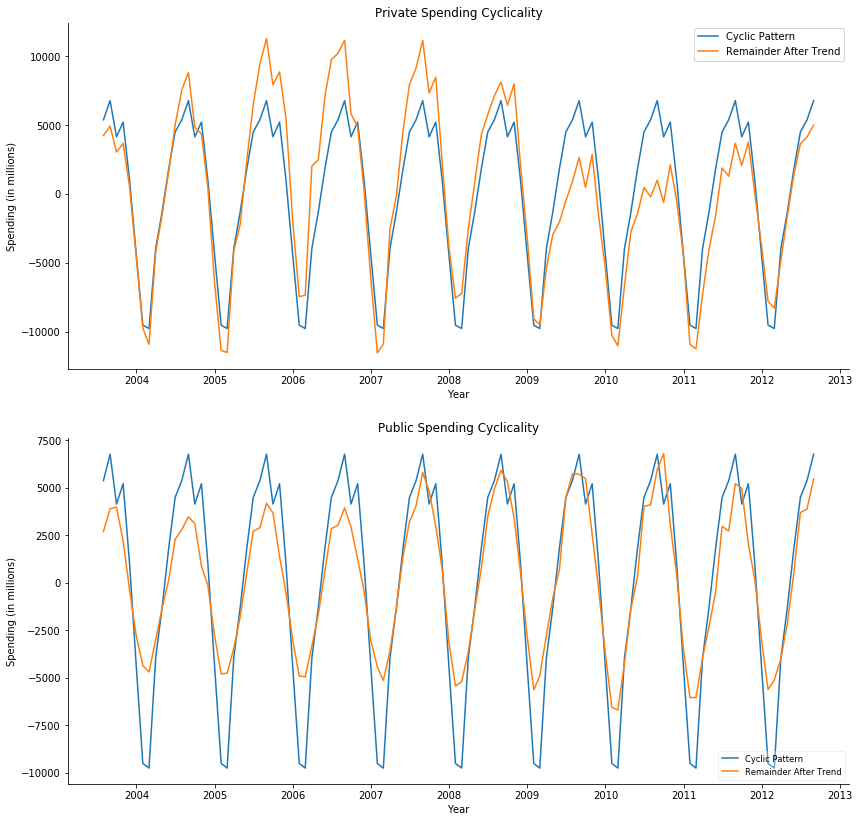

In [176]:
cycleLen = period   # see prior cell for computation of cyclicality period
numCycles = int(len(dfConst)/cycleLen + 0.5)
dfConst['Cpriv'] = np.NaN   # Creates an empty column for the cyclicality component data
dfConst['Cpub'] = np.NaN
for i in range(len(dfConst)):
    dfConst.loc[dfConst.index[i], 'Cpriv'] = avg[i % cycleLen] # Write appropriate cyclicality value
    dfConst.loc[dfConst.index[i], 'Cpub'] = avg[i % cycleLen]
    
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Cpriv'],label='Cyclic Pattern')
ax.plot(dfConst['R1Private'],label='Remainder After Trend')
ax.set_title('Private Spending Cyclicality')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ax1.plot(dfConst['Cpub'],label='Cyclic Pattern')
ax1.plot(dfConst['R1Public'],label='Remainder After Trend')
ax1.set_title('Public Spending Cyclicality')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (in millions)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(loc = 4, fontsize = 'small', framealpha = 0.3)
fig.set_size_inches(14, 14)

In [177]:
dfConst['R2Private'] = dfConst['R1Private'] - dfConst['Cpriv']
dfConst['R2ErrorPrivate'] = abs(dfConst['R2Private']/dfConst['Private Construction'])
dfConst['fitPriv'] = dfConst['MovAvgPriv'] + dfConst['Cpriv']
dfConst.drop(['sqErrPrivate'],axis=1,inplace=True)
print('Average Error - Private: ', sum(dfConst['R2ErrorPrivate'])/len(dfConst))


dfConst['R2Public'] = dfConst['R1Public'] - dfConst['Cpub']
dfConst['R2ErrorPublic'] = abs(dfConst['R2Public']/dfConst['Public Construction'])
dfConst['fitPub'] = dfConst['MovAvgPub'] + dfConst['Cpub']
dfConst.drop(['sqErrPublic'],axis=1,inplace=True)
print('Average Error - Public: ', sum(dfConst['R2ErrorPublic'])/len(dfConst))
print(dfConst)



Average Error - Private:  0.037815969902102356
Average Error - Public:  0.08997824668913712
            Month Month-Year  Total Construction  Private Construction  \
2003-07-31     19     Jul-03               82971                 62216   
2003-08-31     20     Aug-03               85191                 63234   
2003-09-30     21     Sep-03               83841                 61767   
2003-10-31     22     Oct-03               83133                 62813   
2003-11-30     23     Nov-03               77915                 60115   
2003-12-31     24     Dec-03               71050                 55584   
2004-01-31     25     Jan-04               64934                 50975   
2004-02-29     26     Feb-04               64138                 50449   
2004-03-31     27     Mar-04               73238                 57796   
2004-04-30     28     Apr-04               78354                 61177   
2004-05-31     29     May-04               83736                 65027   
2004-06-30     30   

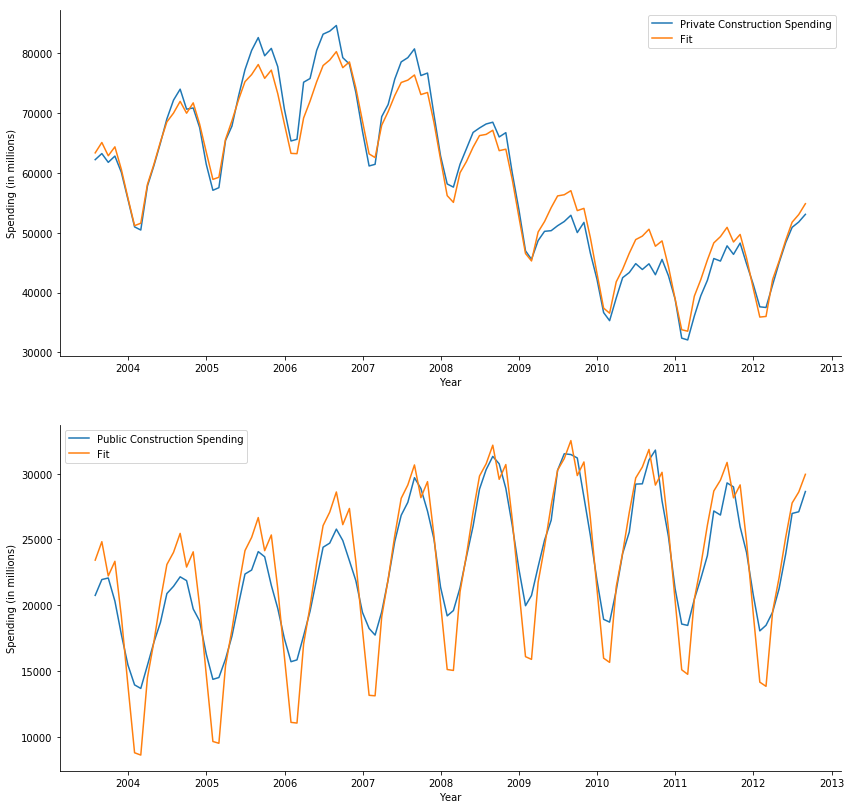

In [178]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Private Construction'],label='Private Construction Spending')
ax.plot(dfConst['fitPriv'], label = 'Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Spending (in millions)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

ax1.plot(dfConst['Public Construction'],label='Public Construction Spending')
ax1.plot(dfConst['fitPub'], label = 'Fit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Spending (in millions)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()
fig.set_size_inches(14, 14)

Private correlation for remaining error after trend and cyclical components:
Correlation, lag  1     0.9027847832948318
Correlation, lag  2     0.7955702460094589
Correlation, lag  3     0.6560564735350041
Correlation, lag  4     0.5316739965331645
Correlation, lag  5     0.40216413631183895
Correlation, lag  6     0.3295267465640479
Correlation, lag  7     0.30585196484336047
Correlation, lag  8     0.330740986282625
Correlation, lag  9     0.3513528536369925
Correlation, lag  10     0.39197130708064265
Correlation, lag  11     0.42152079795616615
Correlation, lag  12     0.45317295658989853
period =  1      Maximum Correlation =  0.9027847832948318


Public correlation for remaining error after trend and cyclical components:
Correlation, lag  1     0.5662158129599647
Correlation, lag  2     0.14470517978796424
Correlation, lag  3     -0.19891323187188728
Correlation, lag  4     -0.3390846926514211
Correlation, lag  5     -0.31777037994891333
Correlation, lag  6     -0.475728293420545

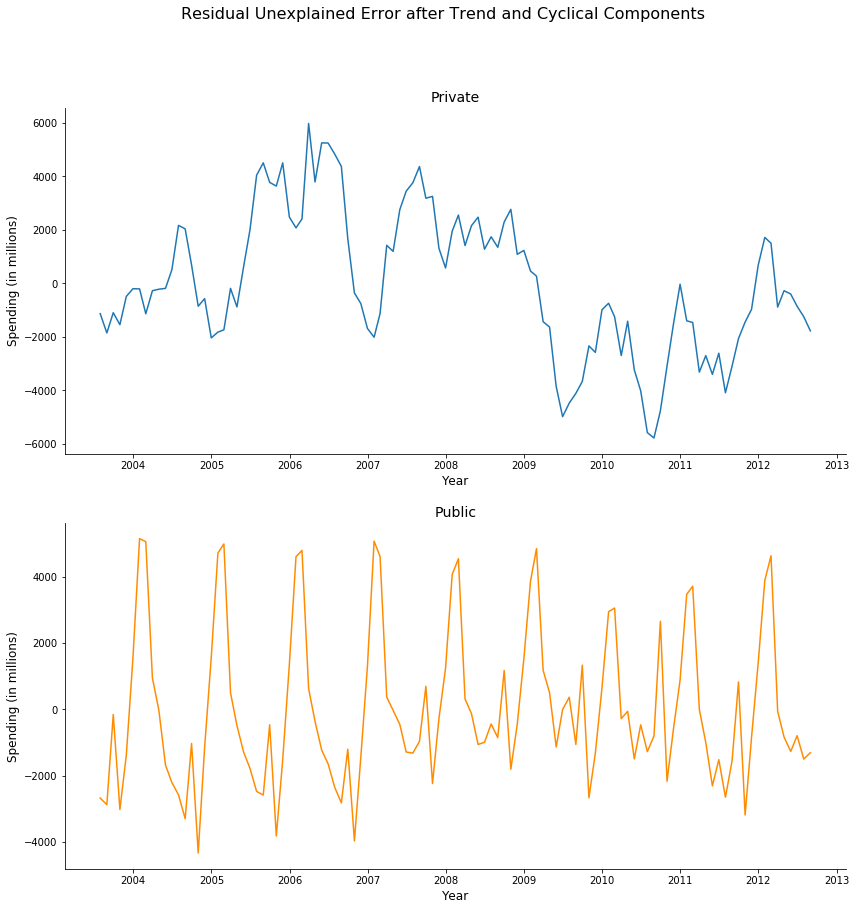

In [179]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['R2Private'],label='Private Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Private', fontsize = 14)

ax1.plot(dfConst['R2Public'],label='Public Remainder after Trend and Cyclical Components', c = 'darkorange')
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Public', fontsize = 14)

fig.set_size_inches(14, 14)
fig.suptitle('Residual Unexplained Error after Trend and Cyclical Components', fontsize = 16)


maxCorrPriv = 0.0
maxCorrPub = 0.0
period = np.NaN
print('Private correlation for remaining error after trend and cyclical components:')
for i in range(1,13):
    corr = dfConst['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPriv:
        maxCorrPriv = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorrPriv)
print('\n')
print('Public correlation for remaining error after trend and cyclical components:')
for i in range(1,13):
    corr = dfConst['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorrPub:
        maxCorrPub = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorrPub)


Text(0.5, 0.98, 'Fit Model Compared to Residual Error')

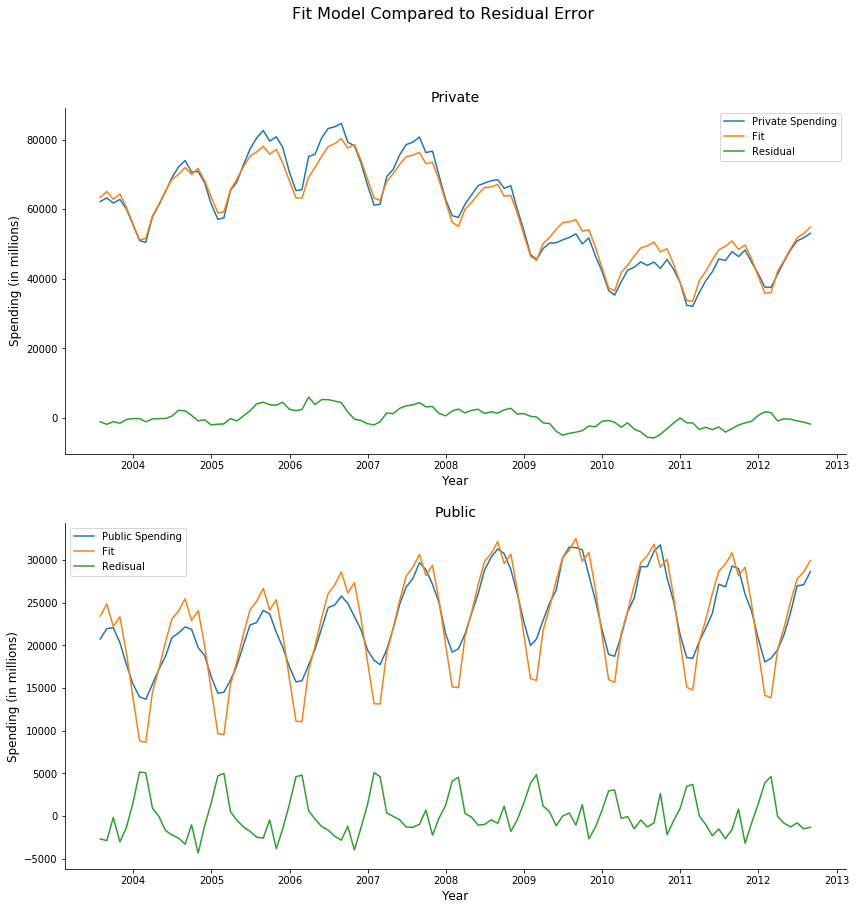

In [180]:
fig, (ax, ax1) = plt.subplots(nrows = 2, ncols = 1)
ax.plot(dfConst['Private Construction'],label='Private Spending')
ax.plot(dfConst['fitPriv'],label='Fit')
ax.plot(dfConst['R2Private'],label='Residual')
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Spending (in millions)', fontsize = 12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Private', fontsize = 14)
ax.legend()


ax1.plot(dfConst['Public Construction'], label='Public Spending')
ax1.plot(dfConst['fitPub'], label = 'Fit')
ax1.plot(dfConst['R2Public'], label = 'Redisual')
ax1.set_xlabel('Year', fontsize = 12)
ax1.set_ylabel('Spending (in millions)', fontsize = 12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Public', fontsize = 14)
ax1.legend()

fig.set_size_inches(14, 14)
fig.suptitle('Fit Model Compared to Residual Error', fontsize = 16)

